## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [145]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)
np.random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [146]:
df = pd.read_csv("ab_data.csv")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [147]:
df.shape[0]

294478

**The number of rows in our dataset is 294478**

c. The number of unique users in the dataset.

In [148]:
df.user_id.nunique()

290584

**The number of unique users in the dataset is 290584**

d. The proportion of users converted.

In [149]:
df.converted.mean() # as the values of converted are 1, 0.

0.11965919355605512

**The proportion of the users converted is 0.11966**

e. The number of times the `new_page` and `treatment` don't match.

In [150]:
df.query('(group != "treatment" and landing_page == "new_page") or (group == "treatment" and landing_page != "new_page")').shape[0]

3893

**The number of times the `new_page` and `treatment` don't match is 3893**

In [151]:
df.query('(group != "treatment" and landing_page == "new_page") or (group == "treatment" and landing_page != "new_page")').head()

,user_id,timestamp,group,landing_page,converted
22,767017,2017-01-12 22:58:14.991443,control,new_page,0
240,733976,2017-01-11 15:11:16.407599,control,new_page,0
308,857184,2017-01-20 07:34:59.832626,treatment,old_page,0
327,686623,2017-01-09 14:26:40.734775,treatment,old_page,0
357,856078,2017-01-12 12:29:30.354835,treatment,old_page,0


f. Do any of the rows have missing values?

In [152]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

**No, our data doesn't have missing values**

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [153]:
df2 = df[((df['group'] == 'control') & (df['landing_page'] == 'old_page')) | ((df['group'] == 'treatment') & (df['landing_page'] == 'new_page'))]

In [154]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [155]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'control') == (df2['landing_page'] == 'old_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [156]:
df2.user_id.nunique()

290584

**There are 290584 unique `user_id` in `df2`**

b. There is one **user_id** repeated in **df2**.  What is it?

In [157]:
df2[df2.user_id.duplicated() == True].user_id

2893    773192
Name: user_id, dtype: int64

**The repeated `user_id` is 773192**

c. What is the row information for the repeat **user_id**? 

In [158]:
df2[df2.user_id.duplicated() == True]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [159]:
df2.drop(index=[2893], axis=0, inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [160]:
df2[df2.user_id.duplicated() == True].index

Int64Index([], dtype='int64')

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [161]:
df2.converted.mean()

0.11959708724499628

**The probability of individual converting** *, regardless of the page they recieved* **is 0.1196**

b. Given that an individual was in the `control` group, what is the probability they converted?

In [162]:
df2[df2['group'] == 'control'].converted.mean()

0.1203863045004612

*Given that an individual is in the control group,* **the probability of conversion is 0.12039**

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [163]:
df2[df2['group'] == 'treatment'].converted.mean()

0.11880806551510564

*Given that an individual is in the treatment group,* **the probability of conversion is 0.11881**

d. What is the probability that an individual received the new page?

In [164]:
df2[df2['landing_page'] == 'new_page'].shape[0] / df2.shape[0]

0.5000619442226688

**The probabilty of recieving a new page is 0.5**

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Depending on the previous results.** No, there's no sufficient evident to conclude that new treatment page leads to more conversions. As although the probabilty of recieving a new page is almost equal to recieving an old page (50%), the conversion rate of the control group, who recieved the old page (12.04%) than the new page (11.88%).

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$H_0: p_{new} - p_{old} \leq 0$$
$$H_1: p_{new} - p_{old} > 0$$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [22]:
p_new = df2.converted.mean()

In [190]:
p_new

0.11959708724499628

**The conversion rate for $p_{new}$ is 0.1196**

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [23]:
p_old = df2.converted.mean()

In [24]:
p_new, p_old

(0.11959708724499628, 0.11959708724499628)

**The conversion rate for $p_{old}$ is 0.1196**

c. What is $n_{new}$, the number of individuals in the treatment group?

In [25]:
n_new = df2.query('group == "treatment"').shape[0]
n_new

145310

**The number of individuals in the treatment group is 145310**

d. What is $n_{old}$, the number of individuals in the control group?

In [26]:
n_old = df2.query('group == "control"').shape[0]
n_old

145274

**The number of individuals in the control group is 145274**

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [67]:
new_page_converted = np.random.choice(a=[1, 0], p=[p_new, 1-p_new], size=n_new)

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [68]:
old_page_converted = np.random.choice(a=[1, 0], p=[p_old, 1-p_old], size=n_old)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [69]:
p_new_sim = new_page_converted.mean()
p_old_sim = old_page_converted.mean()
diff_sim = p_new_sim - p_old_sim
diff_sim

-0.00159882822456478

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [70]:
p_diffs = []
for _ in range(10000):
    sample_new = np.random.choice(a=[1, 0], p=[p_new, 1-p_new], size=n_new)
    p_sample_new = sample_new.mean()
    sample_old = np.random.choice(a=[1, 0], p=[p_old, 1-p_old], size=n_old)
    p_sample_old = sample_old.mean()
    p_sample_diff = p_sample_new - p_sample_old
    p_diffs.append(p_sample_diff)

In [71]:
p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

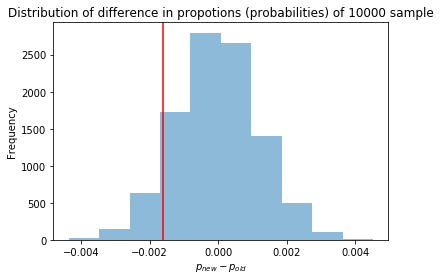

In [72]:
plt.hist(p_diffs, alpha=0.5);
plt.axvline(diff_sim, color='r');
plt.title('Distribution of difference in propotions (probabilities) of 10000 sample');
plt.xlabel('$p_{new} - p_{old}$');
plt.ylabel('Frequency');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [73]:
(p_diffs > diff_sim).mean()

0.90920000000000001

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**The value calculated was the $p-value$.**

**The value is important in hypothesis testing as it determines whether our observed statstic is statistically significant or not. In other word, does the observed statistic rejects the null hypothesis in favor to the alternative hypothesis or it isn't statistically siginficant from the null hypothesis which was assumed true and thus no sufficient evidence to reject the null hypothesis.**

**Becuase $p-value < \alpha$, we conclude that we can't reject the null hypothesis as we don't have sufficient evidence to reject it.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [74]:
import statsmodels.api as sm

convert_old = df2.query('landing_page == "old_page" and converted == 1').shape[0]
convert_new = df2.query('landing_page == "new_page" and converted == 1').shape[0]
n_old = df2.query('landing_page == "old_page"').shape[0]
n_new = df2.query('landing_page == "new_page"').shape[0]
convert_old, convert_new, n_old, n_new

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [76]:
stat, pval = sm.stats.proportions_ztest(count=[convert_new, convert_old], nobs=[n_new, n_old], alternative='larger')
stat, pval

(-1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**The $z-score$ is a normalization of the statistic calculated from the sample and it's calculated from the statistic and mean and the variance from this equation**

$$z = \frac{p_{new} - p_{old}-\bar{P_n - P_o}}{S_{P_n - P_o}}$$
where $\bar{P_n - P_o}$ is the mean of differences of proportions of converted between new and old pages users and $S_{P_n - P_o}$ is the standard deviation of the difference of proportions.

**The p-value, like above, is the propability of getting the statistic under the null hypothesis**

**The p-value is close to the one calculated using sampling distributions.**

**The 2 p-values we calculated refer to the same conclusion, we don't have sufficient evidence to reject the null hypothesis as $p-value < \alpha$

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**We should use Logistic Regression.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [165]:
df2['intercept'] = 1

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [166]:
df2.head() # Make sure we added the intercept correctly

,user_id,timestamp,group,landing_page,converted,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1


In [167]:
group_classes = pd.get_dummies(df['group'])
group_classes.head()

,control,treatment
0,1,0
1,1,0
2,0,1
3,0,1
4,1,0


In [168]:
df2['ab_page'] = group_classes['treatment']

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [169]:
df2.head() # Make sure we added group_classes correctly

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


In [170]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [171]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

"""To solve 'AttributeError: module 'scipy.stats' has no attribute 'chisqprob' ' that occurs when using the Logit class Source: https://github.com/statsmodels/statsmodels/issues/3931
"""

"To solve 'AttributeError: module 'scipy.stats' has no attribute 'chisqprob' ' that occurs when using the Logit class Source: https://github.com/statsmodels/statsmodels/issues/3931\n"

In [172]:
log_model = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = log_model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [173]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 14 Oct 2020   Pseudo R-squ.:               8.077e-06
Time:                        15:44:46   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**The calculate $p-value$ in this section if for these hypotheses:**
$$H_0: \beta_1 = 0$$
$$H_1: \beta_1 \neq 0$$

$\beta_1$ here is the weight multiplied with the page being new "treatment" (1) or old "control" (0).

We can translate it further to:
$$H_0: p_{new} - p_{old} = 0$$
$$H_1: p_{new} - p_{old} \neq 0$$

Which is different from the hypothese we used in A/B testing:

$$H_0: p_{new} - p_{old} \leq 0$$
$$H_1: p_{new} - p_{old} > 0$$

Changing the $H_1$ changes the value of the $p-value$, however, this $p-value$ of 0.19 is larger than $\alpha$ which indicates that a page being old or not wasn't statistically significant to predict wheter convertion will occur or not.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Adding multiple feature hepls us taking into consideration other predictors which may be siginficant for our prediction. $R^2$ value will tell us about the variability betweeen our set of predictors and the output.**

**If multicolinearity occurs between set of features, this will cause some problems in interpreting the results and causing the matrix of features not to be full-rank which results in strange results.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [174]:
countries_df = pd.read_csv("countries.csv")
countries_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [175]:
df_new = df2.set_index('user_id').join(countries_df.set_index('user_id'), how='inner')

In [178]:
df_new.country.unique()

array(['US', 'CA', 'UK'], dtype=object)

In [180]:
country_classes = pd.get_dummies(df_new['country'])
country_classes.head()

,CA,UK,US
user_id,,,
851104,0,0,1
804228,0,0,1
661590,0,0,1
853541,0,0,1
864975,0,0,1


In [181]:
df_new[['CA', 'UK']] = country_classes[['CA', 'UK']]

In [182]:
df_new.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK
user_id,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0


In [184]:
log_model_country = sm.Logit(df_new['converted'], df_new[['intercept', 'CA', 'UK']])
res_country = log_model_country.fit()
res_country.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Wed, 14 Oct 2020   Pseudo R-squ.:               1.521e-05
Time:                        15:51:13   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
CA            -0.0408      0.027     -1.518      0.129      -0.093       0.012
UK             0.0099      0.013      0.746      0.456      -0.016       0.036
==============================================================================
"""

**The `country` feature as itself didn't have a statistic significant in intepreting the results as $p-value < \alpha$.**

Let's make a model with both ab_page and country predictors...

In [186]:
log_model_ab_country = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'CA', 'UK']])
res_ab_country = log_model_ab_country.fit()
res_ab_country.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Wed, 14 Oct 2020   Pseudo R-squ.:               2.323e-05
Time:                        15:54:07   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

**Looks they didn't show siginficane either when combined as all their $p-value < \alpha$**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [187]:
df_new['ab_CA'] = df_new['ab_page'] * df_new['CA']
df_new['ab_UK'] = df_new['ab_page'] * df_new['UK']
df_new.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,ab_CA,ab_UK
user_id,,,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,0,0
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,0,0
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,0,0
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,0,0
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,0,0


In [188]:
log_model_interaction = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'CA', 'UK', 'ab_CA', 'ab_UK']])
res_interaction = log_model_interaction.fit()
res_interaction.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Wed, 14 Oct 2020   Pseudo R-squ.:               3.482e-05
Time:                        15:57:55   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
ab_page       -0.0206      0.014     -1.505      0.132      -0.047       0.006
CA            -0.0175      0.038     -0.465      0.642      -0.091       0.056
UK            -0.0057      0.019     -0.306      0.760      -0.043       0.031
ab_CA         -0.0469      0.054     -0.872      0.383      -0.152       0.059
ab_UK          0.0314      0.027      1.181      0.238      -0.021       0.084
==============================================================================
"""

**Same conclusions for interactions between `ab_page` and `country` because of their large $p-values$**

## Conclusions

**1. Like we concluded in the A/B testing part, the p-values of the difference between using a new and old page wasn't statistically significant different. In the A/B testing, we saw that we couldn't reject the null hypothesis which was that new page was converted less or equall to the old page. In the regression part, we saw that the predictor of either the page was the old or new page wasn't significant colorated to the output of conversion.**

**2. Adding country alone, with the ab_page or doing an interaction between them didn't provide statistically siginficance in our prediction.**

**3. We don't have sufficient evidence to reject the null hypothesis in favor to the alternative hypothesis. We tell the company that we shouldn't implement the new page as we can't say it will do better than the old page IN THE PRESENCE OF THIS DATASET.**

In [193]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0